In [ ]:

import pandas as pd
import numpy as np

np.random.seed(42)

# Clients, produits et régions fictifs
customers = ["Alpha Corp", "Beta Ltd", "Gamma SARL", "Delta Group", "Omega Inc"]
products = ["Laptop", "Phone", "Tablet", "Printer", "Monitor"]
regions = ["North", "South", "East", "West"]

data = []

for i in range(200):  # 200 ventes
    customer = np.random.choice(customers)
    product = np.random.choice(products)
    region = np.random.choice(regions)
    quantity = np.random.randint(1, 10)
    price = np.random.randint(50, 1000)
    date = pd.to_datetime("2025-01-01") + pd.to_timedelta(np.random.randint(0, 120), unit="d")

    data.append([customer, product, region, quantity, price, date])

df = pd.DataFrame(data, columns=["customer", "product", "region", "quantity", "price", "date"])
df["revenue"] = df["quantity"] * df["price"]

df.head()

,customer,product,region,quantity,price,date,revenue
0,Delta Group,Monitor,East,8,750,2025-01-21,6000
1,Beta Ltd,Tablet,East,8,422,2025-04-10,3376
2,Gamma SARL,Monitor,South,8,541,2025-01-30,4328
3,Beta Ltd,Printer,North,1,509,2025-02-27,509
4,Omega Inc,Printer,North,1,524,2025-02-28,524


In [ ]:
df.to_csv("sales_data.csv", index=False)

In [ ]:

from google.colab import files

df.to_csv("sales_data.csv", index=False)

# Télécharge directement le fichier
files.download("sales_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Charger le dataset depuis GitHub (ceci a été la cause de l'erreur 404, car l'URL était incorrecte)
# Au lieu de cela, nous allons utiliser le DataFrame 'df' qui a déjà été créé dans la session.
# df = pd.read_csv(url) # Cette ligne est commentée car elle a causé l'erreur.

# Ajouter la colonne revenue
df["revenue"] = df["quantity"] * df["price"]

# KPI exécutifs
total_revenue = df["revenue"].sum()
revenue_by_region = df.groupby("region")["revenue"].sum()
revenue_by_product = df.groupby("product")["revenue"].sum()
top_clients = df.groupby("customer")["revenue"].sum().sort_values(ascending=False)

# Affichage
print("Chiffre d'affaires total :", total_revenue)
print("\nRevenue par région :\n", revenue_by_region)
print("\nRevenue par produit :\n", revenue_by_product)
print("\nTop clients :\n", top_clients)

Chiffre d'affaires total : 474348

Revenue par région :
 region
East     116698
North    137570
South    116494
West     103586
Name: revenue, dtype: int64

Revenue par produit :
 product
Laptop     131687
Monitor     97566
Phone       70776
Printer     87871
Tablet      86448
Name: revenue, dtype: int64

Top clients :
 customer
Alpha Corp     106726
Omega Inc       99598
Gamma SARL      96462
Beta Ltd        89677
Delta Group     81885
Name: revenue, dtype: int64


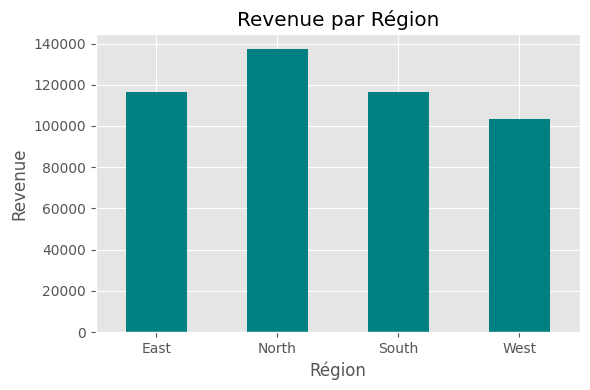

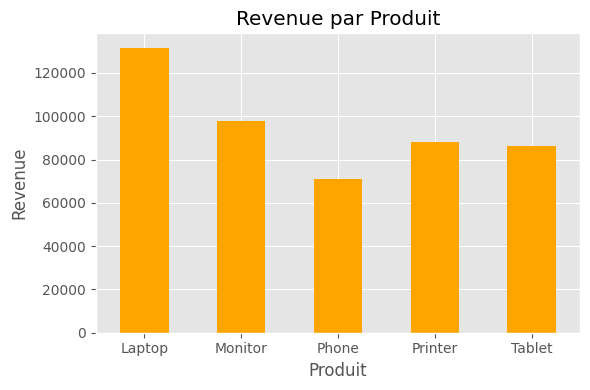

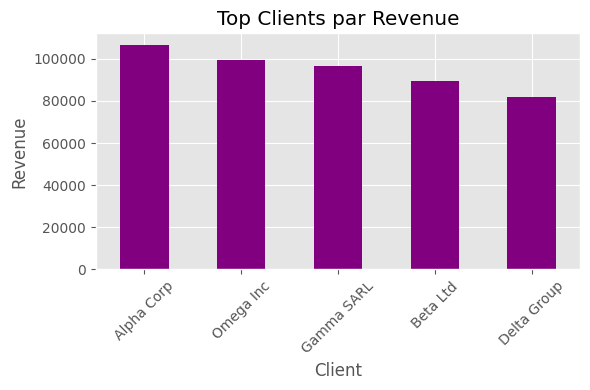

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Import de seaborn ajouté pour utiliser les styles seaborn

# Style professionnel
plt.style.use('ggplot') # Changement de 'seaborn' à 'ggplot' pour un style valide

# 1️⃣ Chiffre d'affaires par région
plt.figure(figsize=(6,4))
revenue_by_region.plot(kind='bar', color='teal')
plt.title("Revenue par Région")
plt.ylabel("Revenue")
plt.xlabel("Région")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2️⃣ Chiffre d'affaires par produit
plt.figure(figsize=(6,4))
revenue_by_product.plot(kind='bar', color='orange')
plt.title("Revenue par Produit")
plt.ylabel("Revenue")
plt.xlabel("Produit")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3️⃣ Top clients
plt.figure(figsize=(6,4))
top_clients.plot(kind='bar', color='purple')
plt.title("Top Clients par Revenue")
plt.ylabel("Revenue")
plt.xlabel("Client")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()